## Linear Modelling & Ablation Studies

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, r2_score, mean_squared_error, explained_variance_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

### Feature names

In [3]:
with open('../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [4]:
feature_names[:3]

['YEAR_2014', 'YEAR_2015', 'YEAR_2016']

### X and Y

In [5]:
X_train = np.load('../data/X_train.npy')

In [6]:
X_train.shape

(13439, 888)

In [7]:
X_test = np.load('../data/X_test.npy')

In [8]:
X_test.shape

(3360, 888)

In [9]:
y_train = np.load('../data/y_train.npy')

In [10]:
y_train.shape

(13439,)

In [11]:
y_test = np.load('../data/y_test.npy')

In [12]:
y_test.shape

(3360,)

### Modelling

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
coefficients = model.coef_

In [16]:
coefficients

array([-5.27130301e-01, -5.13327189e-01,  5.49079621e-02,  5.94494692e-02,
        9.21552964e-01, -1.06653367e+00,  1.06634770e+00,  6.17281643e-01,
       -6.17293173e-01,  6.94691446e-01, -6.95029946e-01,  6.46464712e-01,
       -6.46579912e-01,  5.78799550e-01, -5.78173412e-01, -9.69943165e-02,
       -1.47760497e+00,  5.03230513e-01, -4.92956695e-01,  1.92731510e-01,
        1.37292219e+00, -4.71082765e+00, -1.41617264e+00, -2.46694384e+00,
        1.75395935e-01, -9.82300759e-02, -1.47722958e+00, -4.95502752e+00,
       -7.00632466e-02,  6.11494746e+00,  2.90844196e+00, -3.19692249e+00,
        8.31679347e+00, -5.55177360e-02,  7.10240839e+00, -1.56288511e+00,
        6.13204336e+00, -2.94508160e+00,  3.97684844e-01, -1.54821772e+00,
        3.67471961e+00,  2.13837407e+00, -1.30416106e+01,  5.82589764e-01,
        8.76443614e-01, -1.68804317e+00, -1.20983096e+00,  1.18842576e+01,
       -4.73461972e-01, -7.39929926e-01, -3.89131969e+00, -2.87503972e+00,
        8.95804706e+00, -

In [17]:
model.intercept_

21.407291500466595

In [18]:
indices = np.argsort(coefficients)[::-1]

In [19]:
def print_top_features(features, coefficients, indices):
    print("Feature ranking:")
    for f in range(len(features))[:25]:
        print("%d. Feature %s [%d] (%f)" % (f + 1, features[indices[f]], indices[f], coefficients[indices[f]]))
    print('etc')

In [20]:
print_top_features(feature_names, coefficients, indices)

Feature ranking:
1. Feature FIRST_RESULT_P [821] (48.001221)
2. Feature FIRST_RESULT_F [819] (47.496058)
3. Feature FIRST_CANX_2015.0 [642] (45.433655)
4. Feature FIRST_CANX_2018.0 [645] (44.316437)
5. Feature FIRST_CANX_2016.0 [643] (44.128318)
6. Feature FIRST_CANX_2014.0 [641] (43.929892)
7. Feature FIRST_CANX_2017.0 [644] (43.289236)
8. Feature NUM_MEMBERSHIPS [831] (39.944059)
9. Feature CODE_JHIFR [108] (24.956255)
10. Feature COURSE_Bachelor of Arts Jnt.Hons(Irish&French) [214] (24.956255)
11. Feature PREV_CANX_2013.0 [423] (17.628355)
12. Feature FIRST_RESULT_F0 [820] (13.787464)
13. Feature PREV_DEPT_INSTITUTE OF EDUCATION [249] (13.669016)
14. Feature COURSE_Bachelor of Arts J.H.(Politics&Med Stu) [206] (13.200169)
15. Feature CODE_JHPOM [120] (13.200169)
16. Feature PREV_COURSE_Bachelor of Arts (BAJW) [401] (12.590372)
17. Feature PREV_CODE_BAJW [272] (12.590372)
18. Feature COURSE_BA in Applied Language and Intercultural [145] (11.884258)
19. Feature CODE_ALIS [47] (11.8842

In [21]:
def plot_top_features(feature_names, coefficients, indices, excluded=None):
    N = 10
    plt.figure(figsize=(16, 4))
    plt.title("Top-{} Feature coefficients".format(N))
    plt.bar(range(N), coefficients[indices][:N], color="b", align="center")
    plt.xticks(range(N), [ feature_names[index].replace('_', '\n') for index in indices[:N] ])
    plt.xlim([-1, N])
    if excluded:
        filename = '../figures/Ablation_Excluding_{}_Top_10_Feature_Importances.png'.format(excluded)
    else:
        filename = '../figures/modelling_Logistic_Regression_Top_10_Feature_Importances.png'
    plt.savefig(filename, bbox_inches="tight")

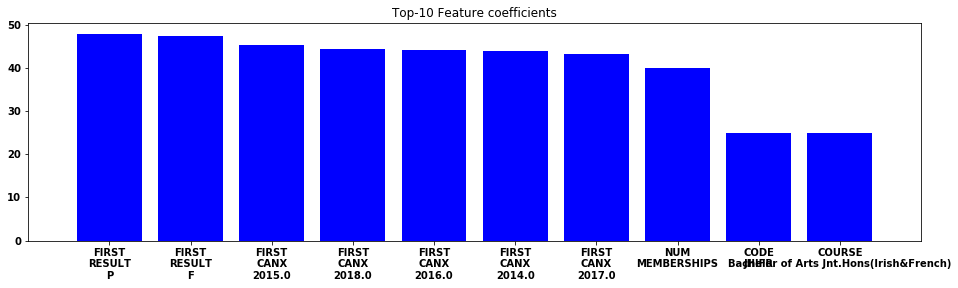

In [22]:
plot_top_features(feature_names, coefficients, indices)

In [23]:
model.score(X_test, y_test)

0.8239498809660055

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred[:2]

array([56.04241421, 52.944574  ])

In [26]:
r2_score(y_test, y_pred)

0.8239498809660055

In [27]:
mean_squared_error(y_test, y_pred)

59.3284167754111

### Ablation studies

In [28]:
original_columns = [
    # CATEGORIES
    'YEAR',
    'EARLY_TRANSFER',
    'EARLY_CANX_LEFT',
    'EARLY_CANX_DEFER',
    'FEB_CANX_LEFT',
    'FEB_CANX_DEFER',
    'FACULTY',
    'DEPT',
    'CODE',
    'COURSE',
    'CANX',
    'PREV_FACULTY',
    'PREV_DEPT',
    'PREV_CODE',
    'PREV_COURSE',
    'PREV_CANX',
    'PREV_RESULT',
    'FIRST_FACULTY',
    'FIRST_DEPT',
    'FIRST_CODE',
    'FIRST_COURSE',
    'FIRST_CANX',
    'NEXT_CODE',
    'NEXT_RESULT',
    'Y2_RETURN',
    'PASS_M1',
    'PASS_M5',
    'PASS_M8',
    'BIO_SEX',
    'ORIGIN_CODE',
    'SCH_ADDR_CODE',
    'SCH_DEIS',
    'SCH_FEE_PAYING',
    'STUDENT_TYPE',
    'STUDENT_ADDR_CODE',
    'ADDRESS_CODE',
    'PERMANENT_ADDR_CODE',
    'ENTERPRISE_ESOC',
    'ACC_FINANCE',
    'FIRST_REL_IND',
    'FIRST_QUARTILE_RANK',
    'SECOND_REL_IND',
    'SECOND_QUARTILE_RANK',
    'FIRST_RESULT',
    # NUMBERS
    'YR_NUM',
    'TOTAL_YEARS',
    'DAYS_TO_FIRST_REG',
    'SCH_ENROLMENTS',
    'YEARS_SINCE_LC',
    'CAO_POINTS',
    'LC_MATHS_POINTS',
    'NUM_GRANTS',
    'NUM_SUBJECTS',
    'NUM_MEMBERSHIPS',
    'NUM_SOCIETIES',
    'NUM_CLUBS',
    'NUM_M1_SUBJECTS',
    'NUM_M5_SUBJECTS',
    'NUM_M8_SUBJECTS',
    'NUM_M1_FAILS',
    'NUM_M5_FAILS',
    'AGE_AT_START',
    'NUM_EARLY_LOANS',
    'DAYS_TO_FIRST_LOAN',
    'DAYS_TO_FIRST_LAB',
    'DAYS_TO_FIRST_ACCESS',
    'DAYS_TO_FIRST_DUE_DATE',
    'DAYS_FIRST_SUBMITTED_EARLY',
    'FIRST_GRADE',
    'FIRST_ASSIGN_GRADE',
    'FIRST_GRADE_PC',
    'FIRST_GRADE',
    'DAYS_TO_SECOND_DUE_DATE',
    'DAYS_SECOND_SUBMITTED_EARLY',
    'SECOND_GRADE',
    'SECOND_ASSIGN_GRADE',
    'SECOND_GRADE_PC',
    'NUM_EARLY_ASSIGNMENTS',
    'NUM_EARLY_LATES',
    'EARLY_Q1_SUBS_PC',
    'EARLY_Q2_SUBS_PC',
    'EARLY_Q3_SUBS_PC',
    'EARLY_Q4_SUBS_PC',
    'NUM_EARLY_CRM',
    'NUM_EARLY_ACCESS_DAYS',
    'NUM_EARLY_TYPE_A',
    'NUM_EARLY_TYPE_B',
    'NUM_EARLY_TYPE_C',
    'NUM_EARLY_TYPE_D',
    'NUM_EARLY_TYPE_E',
    'NUM_EARLY_TYPE_S',
    'NUM_EARLY_TYPE_X',
    'NUM_FEB_CRM',
    'NUM_FEB_ACCESS_DAYS',
    'NUM_FEB_TYPE_A',
    'NUM_FEB_TYPE_B',
    'NUM_FEB_TYPE_C',
    'NUM_FEB_TYPE_D',
    'NUM_FEB_TYPE_E',
    'NUM_FEB_TYPE_S',
    'NUM_FEB_TYPE_X',
    'NUM_MAY_CRM',
    'NUM_MAY_TYPE_A',
    'NUM_MAY_TYPE_B',
    'NUM_MAY_TYPE_C',
    'NUM_MAY_TYPE_D',
    'NUM_MAY_TYPE_E',
    'NUM_MAY_TYPE_S',
    'NUM_MAY_TYPE_X',
    'DAYS_TO_FIRST_CRM',
    'PREV_NUM_CRM',
]

In [29]:
def train_model(cols_names_to_remove):
    
    # Columns to drop
    cols_to_drop = []
    for col in cols_names_to_remove:
        cols_to_drop.extend([ feature_name for feature_name in feature_names if feature_name.startswith(col) ])
    print('Excluding:', cols_to_drop)
    
    # Indexes to drop
    indexes_to_drop = [ feature_names.index(col) for col in cols_to_drop ]
    # Deep copy of the list
    features = feature_names[:] # or list(feature_names)
    for index in sorted(indexes_to_drop, reverse=True):
        del features[index]
    
    # New train and test sets
    X_mini_train = np.delete(X_train, indexes_to_drop, axis=1)
    X_mini_test = np.delete(X_test, indexes_to_drop, axis=1)
    
    # model
    model = LinearRegression()
    # train
    model.fit(X_mini_train, y_train)
    
    # scores
    score = model.score(X_mini_test, y_test)
    
    # Predictions
    y_mini_pred = model.predict(X_mini_test)
    
    # Scorings
    r2 = r2_score(y_test, y_mini_pred)
    mse = mean_squared_error(y_test, y_mini_pred)
    var = explained_variance_score(y_test, y_mini_pred)
    
    # Get coefficients and indices
    coefficients = model.coef_
    indices = np.argsort(coefficients)[::-1]
    
    # Print top features
    # print_top_features(features, coefficients, indices)
    
    # Plot top features
    # plot_top_features(features, coefficients, indices, excluded=column_name)
    
    print('Score: {:0.4f}\t R2: {:0.10f}\t MSE: {:0.10f}\t Variance: {:0.10f}'.format(score, r2, mse, var))
    
    return r2, mse, var

### Individual features

In [30]:
var_scores = {}
r2_scores = {}
mse_scores = {}

for column_name in original_columns:
    
    print('Leaving Column {} out'.format(column_name))
    
    # Train a model and give me back the variance explained
    r2, mse, var = train_model([ column_name ])
    
    # Leaving that column out, we get this variance explained
    var_scores[column_name] = var
    r2_scores[column_name] = r2
    mse_scores[column_name] = mse

    print()

Leaving Column YEAR out
Excluding: ['YEAR_2014', 'YEAR_2015', 'YEAR_2016', 'YEAR_2017', 'YEAR_2018', 'YEARS_SINCE_LC']
Score: 0.8233	 R2: 0.8232910792	 MSE: 59.5504312141	 Variance: 0.8233147258

Leaving Column EARLY_TRANSFER out
Excluding: ['EARLY_TRANSFER_N', 'EARLY_TRANSFER_Y']
Score: 0.8003	 R2: 0.8002970021	 MSE: 67.2993733420	 Variance: 0.8003063898

Leaving Column EARLY_CANX_LEFT out
Excluding: ['EARLY_CANX_LEFT_N', 'EARLY_CANX_LEFT_Y']
Score: 0.8239	 R2: 0.8238656545	 MSE: 59.3568008750	 Variance: 0.8238879830

Leaving Column EARLY_CANX_DEFER out
Excluding: ['EARLY_CANX_DEFER_N', 'EARLY_CANX_DEFER_Y']
Score: 0.8239	 R2: 0.8239263635	 MSE: 59.3363421133	 Variance: 0.8239483962

Leaving Column FEB_CANX_LEFT out
Excluding: ['FEB_CANX_LEFT_N', 'FEB_CANX_LEFT_Y']
Score: 0.8239	 R2: 0.8239137069	 MSE: 59.3406073266	 Variance: 0.8239353910

Leaving Column FEB_CANX_DEFER out
Excluding: ['FEB_CANX_DEFER_N', 'FEB_CANX_DEFER_Y']
Score: 0.8239	 R2: 0.8239256615	 MSE: 59.3365786804	 Varianc

Score: 0.8236	 R2: 0.8236175557	 MSE: 59.4404094957	 Variance: 0.8236386189

Leaving Column PREV_CODE out
Excluding: ['PREV_CODE_AC', 'PREV_CODE_ACM', 'PREV_CODE_AF', 'PREV_CODE_ALIS', 'PREV_CODE_ALTS', 'PREV_CODE_AMPS', 'PREV_CODE_AP', 'PREV_CODE_AS', 'PREV_CODE_ATT', 'PREV_CODE_BAJG', 'PREV_CODE_BAJH', 'PREV_CODE_BAJI', 'PREV_CODE_BAJL', 'PREV_CODE_BAJM', 'PREV_CODE_BAJP', 'PREV_CODE_BAJW', 'PREV_CODE_BCL', 'PREV_CODE_BECE', 'PREV_CODE_BED', 'PREV_CODE_BHS', 'PREV_CODE_BMED', 'PREV_CODE_BNCG', 'PREV_CODE_BNGN', 'PREV_CODE_BNID', 'PREV_CODE_BNPY', 'PREV_CODE_BNS', 'PREV_CODE_BPY', 'PREV_CODE_BRE', 'PREV_CODE_BRH', 'PREV_CODE_BRM', 'PREV_CODE_BS', 'PREV_CODE_BT', 'PREV_CODE_CA', 'PREV_CODE_CAFM', 'PREV_CODE_CAM', 'PREV_CODE_CCS', 'PREV_CODE_CE', 'PREV_CODE_CES', 'PREV_CODE_CPSSD', 'PREV_CODE_CS', 'PREV_CODE_DME', 'PREV_CODE_EBF', 'PREV_CODE_EBG', 'PREV_CODE_EBS', 'PREV_CODE_EBT', 'PREV_CODE_EC', 'PREV_CODE_ECE', 'PREV_CODE_EE', 'PREV_CODE_ENGLIC', 'PREV_CODE_EPL', 'PREV_CODE_ESH', 'PRE

Score: 0.8246	 R2: 0.8246490558	 MSE: 59.0927967510	 Variance: 0.8246708816

Leaving Column FIRST_COURSE out
Excluding: ['FIRST_COURSE_B.Eng. Mechanical & Manufacturing Eng', 'FIRST_COURSE_B.Eng. in Biomedical Engineering', 'FIRST_COURSE_B.Eng. in Common Entry into Engineering', 'FIRST_COURSE_B.Eng. in Digital Media Engineering', 'FIRST_COURSE_B.Eng. in Mechatronic Engineering', 'FIRST_COURSE_BA Gaeilge agus Iriseoireacht', 'FIRST_COURSE_BA Gno agus Gaeilge', 'FIRST_COURSE_BA Languages for Int. Communication(Eng)', 'FIRST_COURSE_BA in Accounting and Finance', 'FIRST_COURSE_BA in Applied Language & Translation Stu', 'FIRST_COURSE_BA in Applied Language and Intercultural', 'FIRST_COURSE_BA in Communication Studies', 'FIRST_COURSE_BA in Contemporary Culture and Society', 'FIRST_COURSE_BA in Economics, Politics and Law', 'FIRST_COURSE_BA in Global Business (Canada)', 'FIRST_COURSE_BA in Global Business (France)', 'FIRST_COURSE_BA in Global Business (Germany)', 'FIRST_COURSE_BA in Global Bu

Score: 0.8217	 R2: 0.8217390103	 MSE: 60.0734742314	 Variance: 0.8217588170

Leaving Column STUDENT_ADDR_CODE out
Excluding: ['STUDENT_ADDR_CODE_0.0', 'STUDENT_ADDR_CODE_1.0', 'STUDENT_ADDR_CODE_2.0', 'STUDENT_ADDR_CODE_3.0', 'STUDENT_ADDR_CODE_4.0', 'STUDENT_ADDR_CODE_5.0', 'STUDENT_ADDR_CODE_6.0', 'STUDENT_ADDR_CODE_7.0', 'STUDENT_ADDR_CODE_8.0', 'STUDENT_ADDR_CODE_9.0', 'STUDENT_ADDR_CODE_10.0', 'STUDENT_ADDR_CODE_11.0']
Score: 0.8235	 R2: 0.8235021381	 MSE: 59.4793049052	 Variance: 0.8235253791

Leaving Column ADDRESS_CODE out
Excluding: ['ADDRESS_CODE_0.0', 'ADDRESS_CODE_1.0', 'ADDRESS_CODE_2.0', 'ADDRESS_CODE_3.0', 'ADDRESS_CODE_4.0', 'ADDRESS_CODE_5.0', 'ADDRESS_CODE_6.0', 'ADDRESS_CODE_7.0', 'ADDRESS_CODE_8.0', 'ADDRESS_CODE_9.0', 'ADDRESS_CODE_10.0', 'ADDRESS_CODE_11.0']
Score: 0.8236	 R2: 0.8236311679	 MSE: 59.4358222291	 Variance: 0.8236562492

Leaving Column PERMANENT_ADDR_CODE out
Excluding: ['PERMANENT_ADDR_CODE_0.0', 'PERMANENT_ADDR_CODE_1.0', 'PERMANENT_ADDR_CODE_2.0', 

Score: 0.8238	 R2: 0.8238151802	 MSE: 59.3738105578	 Variance: 0.8238368950

Leaving Column NUM_EARLY_CRM out
Excluding: ['NUM_EARLY_CRM']
Score: 0.8239	 R2: 0.8239498616	 MSE: 59.3284233078	 Variance: 0.8239716865

Leaving Column NUM_EARLY_ACCESS_DAYS out
Excluding: ['NUM_EARLY_ACCESS_DAYS']
Score: 0.8239	 R2: 0.8239454264	 MSE: 59.3299179627	 Variance: 0.8239664805

Leaving Column NUM_EARLY_TYPE_A out
Excluding: ['NUM_EARLY_TYPE_A']
Score: 0.8239	 R2: 0.8239498831	 MSE: 59.3284160550	 Variance: 0.8239717081

Leaving Column NUM_EARLY_TYPE_B out
Excluding: ['NUM_EARLY_TYPE_B']
Score: 0.8239	 R2: 0.8239498932	 MSE: 59.3284126536	 Variance: 0.8239717182

Leaving Column NUM_EARLY_TYPE_C out
Excluding: ['NUM_EARLY_TYPE_C']
Score: 0.8239	 R2: 0.8239498552	 MSE: 59.3284254541	 Variance: 0.8239716801

Leaving Column NUM_EARLY_TYPE_D out
Excluding: ['NUM_EARLY_TYPE_D']
Score: 0.8239	 R2: 0.8239498622	 MSE: 59.3284231034	 Variance: 0.8239716871

Leaving Column NUM_EARLY_TYPE_E out
Excluding: ['

In [31]:
def plot(scores, title):
    plt.figure(figsize=(16, 4))
    plt.title(title)
    plt.bar(range(len(scores)), scores.values(), color="b", align="center")
    plt.xticks(range(len(scores)), scores.keys(), rotation='vertical', fontsize=6)
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.1)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.15)
    filename = '../figures/{}.png'.format(title.lower().replace(' ', '_'))
    plt.savefig(filename, bbox_inches="tight", dpi=100)

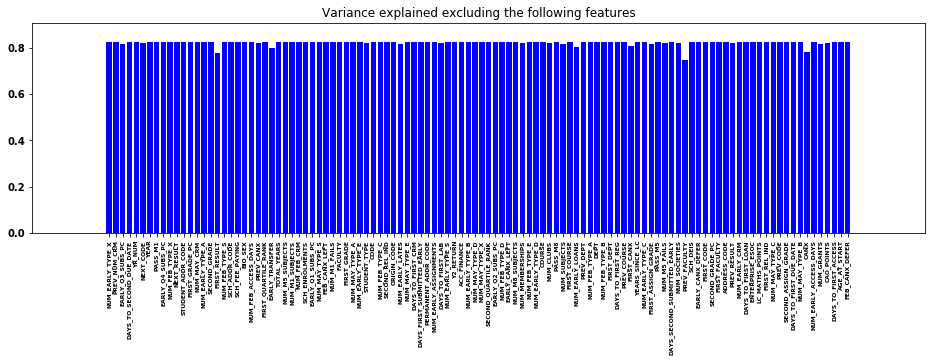

In [32]:
plot(var_scores, "Variance explained excluding the following features")

In [33]:
for key, value in sorted(var_scores.items(), key=lambda kv: kv[1]):
    print('Excluding {},\t variance explained:{:0.5f}'.format(key, value))

Excluding PREV_FACULTY,	 variance explained:0.74471
Excluding FIRST_RESULT,	 variance explained:0.77529
Excluding CANX,	 variance explained:0.78030
Excluding EARLY_TRANSFER,	 variance explained:0.80031
Excluding NUM_EARLY_LOANS,	 variance explained:0.80181
Excluding FIRST_CANX,	 variance explained:0.80835
Excluding EARLY_Q3_SUBS_PC,	 variance explained:0.81506
Excluding FIRST_ASSIGN_GRADE,	 variance explained:0.81639
Excluding NUM_GRANTS,	 variance explained:0.81665
Excluding NUM_EARLY_LATES,	 variance explained:0.81759
Excluding NUM_SUBJECTS,	 variance explained:0.81784
Excluding NUM_MEMBERSHIPS,	 variance explained:0.81999
Excluding NUM_CLUBS,	 variance explained:0.81999
Excluding PREV_RESULT,	 variance explained:0.82002
Excluding NUM_SOCIETIES,	 variance explained:0.82003
Excluding NEXT_CODE,	 variance explained:0.82102
Excluding PREV_CANX,	 variance explained:0.82138
Excluding NUM_M5_FAILS,	 variance explained:0.82171
Excluding STUDENT_TYPE,	 variance explained:0.82176
Excluding DA

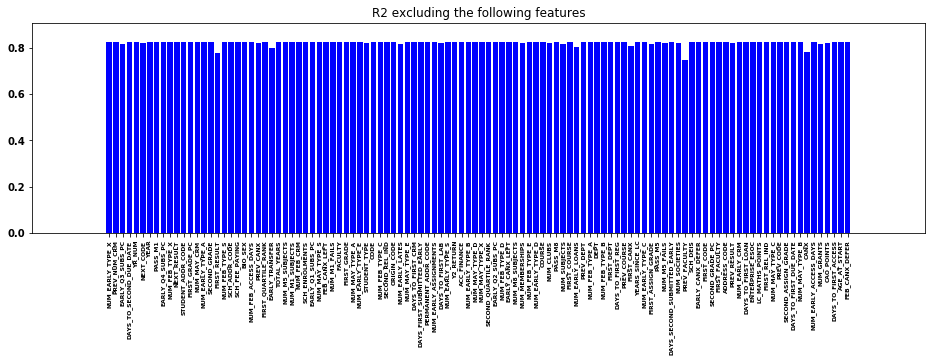

In [34]:
plot(r2_scores, "R2 excluding the following features")

In [35]:
for key, value in sorted(r2_scores.items(), key=lambda kv: kv[1]):
    print('Excluding {},\t R2:{:0.5f}'.format(key, value))

Excluding PREV_FACULTY,	 R2:0.74471
Excluding FIRST_RESULT,	 R2:0.77524
Excluding CANX,	 R2:0.78028
Excluding EARLY_TRANSFER,	 R2:0.80030
Excluding NUM_EARLY_LOANS,	 R2:0.80181
Excluding FIRST_CANX,	 R2:0.80832
Excluding EARLY_Q3_SUBS_PC,	 R2:0.81504
Excluding FIRST_ASSIGN_GRADE,	 R2:0.81637
Excluding NUM_GRANTS,	 R2:0.81663
Excluding NUM_EARLY_LATES,	 R2:0.81759
Excluding NUM_SUBJECTS,	 R2:0.81783
Excluding NUM_MEMBERSHIPS,	 R2:0.81996
Excluding NUM_CLUBS,	 R2:0.81996
Excluding PREV_RESULT,	 R2:0.81998
Excluding NUM_SOCIETIES,	 R2:0.81999
Excluding NEXT_CODE,	 R2:0.82099
Excluding PREV_CANX,	 R2:0.82136
Excluding NUM_M5_FAILS,	 R2:0.82168
Excluding STUDENT_TYPE,	 R2:0.82174
Excluding DAYS_TO_FIRST_LAB,	 R2:0.82191
Excluding CAO_POINTS,	 R2:0.82192
Excluding LC_MATHS_POINTS,	 R2:0.82290
Excluding YR_NUM,	 R2:0.82323
Excluding YEARS_SINCE_LC,	 R2:0.82326
Excluding ACC_FINANCE,	 R2:0.82326
Excluding YEAR,	 R2:0.82329
Excluding BIO_SEX,	 R2:0.82341
Excluding PASS_M5,	 R2:0.82344
Excluding

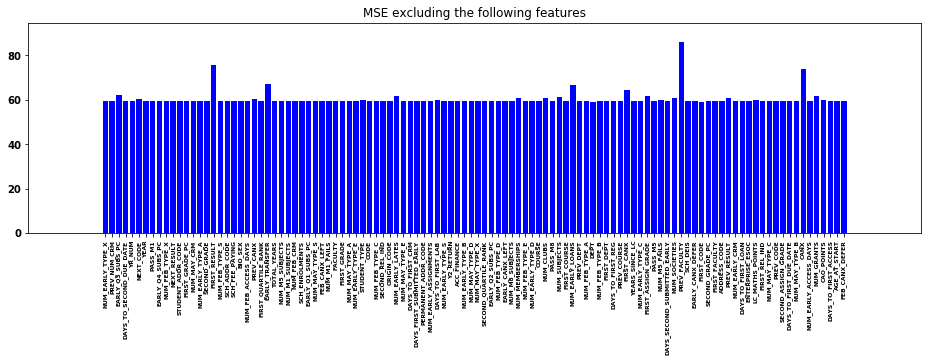

In [36]:
plot(mse_scores, "MSE excluding the following features")

In [37]:
for key, value in sorted(mse_scores.items(), reverse=True, key=lambda kv: kv[1]):
    print('Excluding {},\t MSE:{:0.5f}'.format(key, value))

Excluding PREV_FACULTY,	 MSE:86.03173
Excluding FIRST_RESULT,	 MSE:75.74278
Excluding CANX,	 MSE:74.04580
Excluding EARLY_TRANSFER,	 MSE:67.29937
Excluding NUM_EARLY_LOANS,	 MSE:66.79000
Excluding FIRST_CANX,	 MSE:64.59404
Excluding EARLY_Q3_SUBS_PC,	 MSE:62.33040
Excluding FIRST_ASSIGN_GRADE,	 MSE:61.88174
Excluding NUM_GRANTS,	 MSE:61.79431
Excluding NUM_EARLY_LATES,	 MSE:61.47150
Excluding NUM_SUBJECTS,	 MSE:61.38987
Excluding NUM_MEMBERSHIPS,	 MSE:60.67313
Excluding NUM_CLUBS,	 MSE:60.67243
Excluding PREV_RESULT,	 MSE:60.66482
Excluding NUM_SOCIETIES,	 MSE:60.66216
Excluding NEXT_CODE,	 MSE:60.32645
Excluding PREV_CANX,	 MSE:60.20092
Excluding NUM_M5_FAILS,	 MSE:60.09231
Excluding STUDENT_TYPE,	 MSE:60.07347
Excluding DAYS_TO_FIRST_LAB,	 MSE:60.01597
Excluding CAO_POINTS,	 MSE:60.01211
Excluding LC_MATHS_POINTS,	 MSE:59.68345
Excluding YR_NUM,	 MSE:59.57153
Excluding YEARS_SINCE_LC,	 MSE:59.56227
Excluding ACC_FINANCE,	 MSE:59.55925
Excluding YEAR,	 MSE:59.55043
Excluding BIO_SEX,	

### Combinations of features

In [38]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'LC_MATHS_POINTS',
    'CAO_POINTS',
]

In [39]:
column_names

['DAYS_TO_FIRST_REG', 'LC_MATHS_POINTS', 'CAO_POINTS']

In [40]:
train_model(column_names)

Excluding: ['DAYS_TO_FIRST_REG', 'LC_MATHS_POINTS', 'CAO_POINTS']
Score: 0.8180	 R2: 0.8179647644	 MSE: 61.3453849684	 Variance: 0.8179740401


(0.8179647643935553, 61.34538496837886, 0.8179740400787501)

In [41]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'LC_MATHS_POINTS',
]
train_model(column_names)

Excluding: ['DAYS_TO_FIRST_REG', 'LC_MATHS_POINTS']
Score: 0.8229	 R2: 0.8229158603	 MSE: 59.6768789651	 Variance: 0.8229297646


(0.8229158602841655, 59.67687896506038, 0.8229297645695834)

In [42]:
column_names = [
    'LC_MATHS_POINTS',
    'CAO_POINTS',
]
train_model(column_names)

Excluding: ['LC_MATHS_POINTS', 'CAO_POINTS']
Score: 0.8179	 R2: 0.8179389021	 MSE: 61.3541004894	 Variance: 0.8179496028


(0.8179389021070862, 61.354100489383995, 0.8179496028263451)

In [43]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'CAO_POINTS',
]
train_model(column_names)

Excluding: ['DAYS_TO_FIRST_REG', 'CAO_POINTS']
Score: 0.8220	 R2: 0.8219603475	 MSE: 59.9988842038	 Variance: 0.8219809404


(0.8219603475013206, 59.99888420382939, 0.8219809404491901)

In [44]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'LC_MATHS_POINTS',
    'CAO_POINTS',
    'DAYS_TO_FIRST_LAB',
]
train_model(column_names)

Excluding: ['DAYS_TO_FIRST_REG', 'LC_MATHS_POINTS', 'CAO_POINTS', 'DAYS_TO_FIRST_LAB']
Score: 0.8171	 R2: 0.8171123592	 MSE: 61.6326432139	 Variance: 0.8171215332


(0.8171123592381231, 61.63264321393121, 0.8171215332284123)

In [45]:
column_names = [
    'DAYS_TO_FIRST_REG',
    'DAYS_TO_FIRST_LAB',
]
train_model(column_names)

Excluding: ['DAYS_TO_FIRST_REG', 'DAYS_TO_FIRST_LAB']
Score: 0.8221	 R2: 0.8220796370	 MSE: 59.9586839660	 Variance: 0.8220985187


(0.822079636992701, 59.958683965963154, 0.8220985187283016)

In [46]:
column_names = [
    'CAO_POINTS',
    'DAYS_TO_FIRST_LAB',
]
train_model(column_names)

Excluding: ['CAO_POINTS', 'DAYS_TO_FIRST_LAB']
Score: 0.8187	 R2: 0.8187492484	 MSE: 61.0810159700	 Variance: 0.8187703674


(0.8187492483922396, 61.081015970033555, 0.8187703673753373)

In [47]:
column_names = [
    'PREV_FACULTY',
    'FACULTY',
]
train_model(column_names)

Excluding: ['PREV_FACULTY_DCU BUSINESS SCHOOL', 'PREV_FACULTY_DCUBS/HSS', 'PREV_FACULTY_ENGINEERING AND COMPUTING', 'PREV_FACULTY_HUMANITIES AND SOCIAL SCIENCES', 'PREV_FACULTY_INSTITUTE OF EDUCATION', 'PREV_FACULTY_SCIENCE AND HEALTH', 'FACULTY_DCU BUSINESS SCHOOL', 'FACULTY_DCUBS/HSS', 'FACULTY_ENGINEERING AND COMPUTING', 'FACULTY_HUMANITIES AND SOCIAL SCIENCES', 'FACULTY_INSTITUTE OF EDUCATION', 'FACULTY_SCIENCE AND HEALTH']
Score: 0.8200	 R2: 0.8200263813	 MSE: 60.6506256075	 Variance: 0.8200535233


(0.8200263813188963, 60.65062560752743, 0.8200535232976707)

In [48]:
column_names = [
    'PREV_',
    'FIRST_',
    'CANX'
]
train_model(column_names)

Excluding: ['PREV_FACULTY_DCU BUSINESS SCHOOL', 'PREV_FACULTY_DCUBS/HSS', 'PREV_FACULTY_ENGINEERING AND COMPUTING', 'PREV_FACULTY_HUMANITIES AND SOCIAL SCIENCES', 'PREV_FACULTY_INSTITUTE OF EDUCATION', 'PREV_FACULTY_SCIENCE AND HEALTH', 'PREV_DEPT_BIOTECHNOLOGY', 'PREV_DEPT_CHEMICAL SCIENCES', 'PREV_DEPT_COMMUNICATIONS', 'PREV_DEPT_COMPUTING', 'PREV_DEPT_DCU BUSINESS SCHOOL', 'PREV_DEPT_DCUBS / HSS L&G Programmes', 'PREV_DEPT_EDUCATION', 'PREV_DEPT_ELECTRONIC ENGINEERING', 'PREV_DEPT_FIONTAR', 'PREV_DEPT_FIONTAR/COMMUNICATIONS', 'PREV_DEPT_Fiontar agus Scoil na Gaeilge', 'PREV_DEPT_HEALTH AND HUMAN PERFORMANCE', 'PREV_DEPT_HUMANITIES AND SOCIAL SCIENCES', 'PREV_DEPT_INSTITUTE OF EDUCATION', 'PREV_DEPT_LAW AND GOVERNMENT', 'PREV_DEPT_Language, Literacy and ECE', 'PREV_DEPT_MATHEMATICAL SCIENCES', 'PREV_DEPT_MECHANICAL ENGINEERING', 'PREV_DEPT_NURSING', 'PREV_DEPT_PHYSICAL SCIENCES', 'PREV_DEPT_SALIS', 'PREV_CODE_AC', 'PREV_CODE_ACM', 'PREV_CODE_AF', 'PREV_CODE_ALIS', 'PREV_CODE_ALTS', '

Score: 0.7550	 R2: 0.7549653111	 MSE: 82.5760313596	 Variance: 0.7550442864


(0.7549653110540988, 82.57603135961823, 0.7550442863641252)

In [49]:
column_names = []
train_model(column_names)

Excluding: []
Score: 0.8239	 R2: 0.8239499419	 MSE: 59.3283962492	 Variance: 0.8239717661


(0.8239499418749829, 59.328396249249494, 0.8239717660706911)